In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



## Dataset Selection and Preprocessing

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)


In [ ]:
# Few rows of data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
#  Data Statistical details
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# check for duplicates
df.duplicated().sum()

np.int64(1)

In [ ]:
# remove dupicate
df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

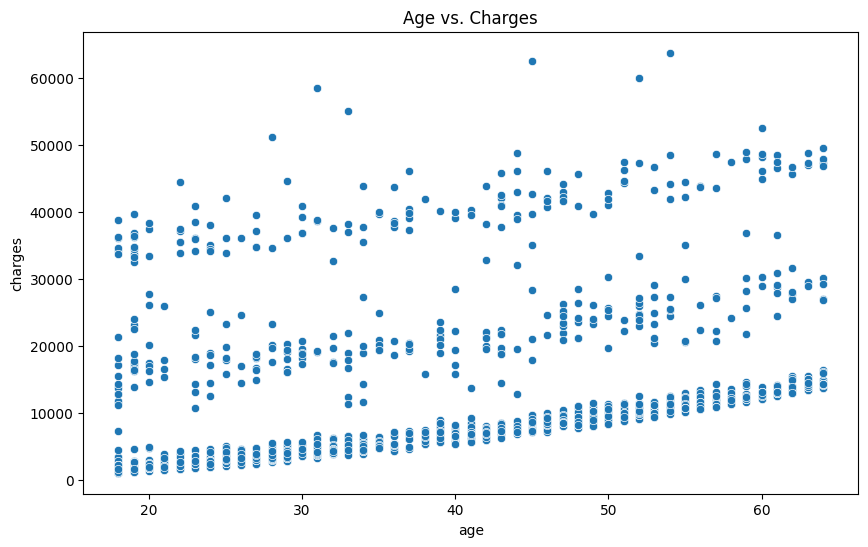

In [ ]:
# Plot scatter plots for numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs. Charges')
plt.show()

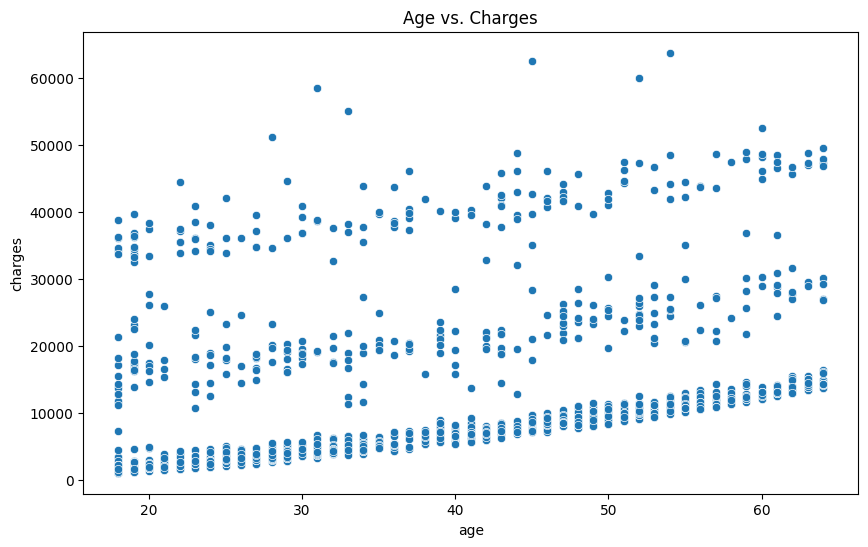

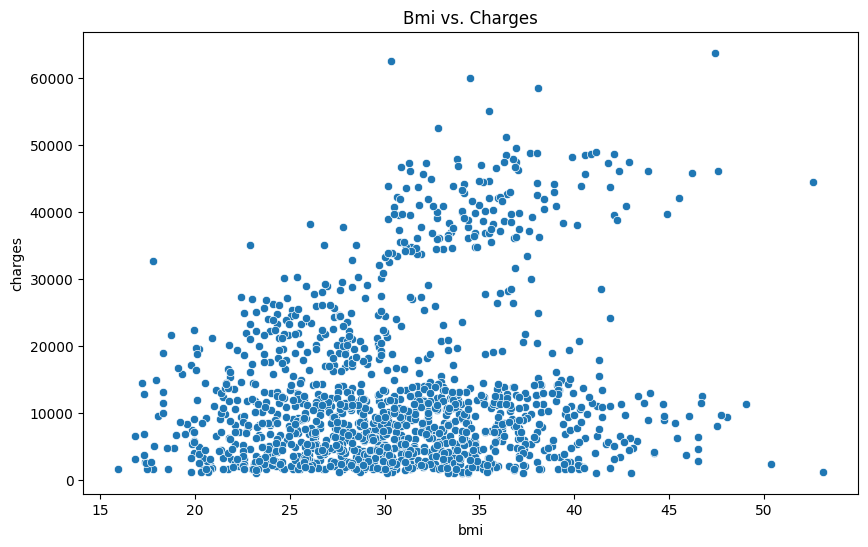

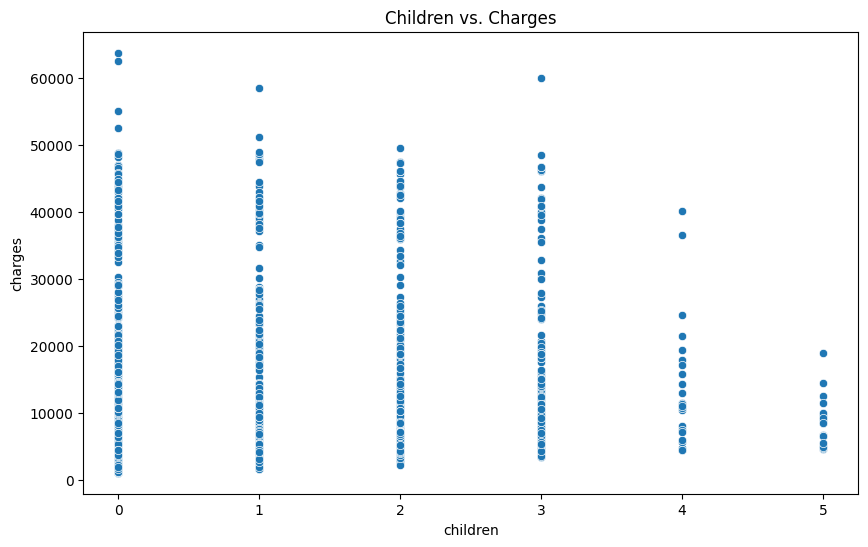

In [ ]:
def plot_numerical_scatterplots(df, numerical_cols, target_col):
    """Plots scatter plots for numerical columns against a target column.

    Args:
        df (pd.DataFrame): The input DataFrame.
        numerical_cols (list): A list of numerical column names.
        target_col (str): The name of the target column.
    """
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=col, y=target_col)
        plt.title(f'{col.capitalize()} vs. {target_col.capitalize()}')
        plt.show()

# Use the defined function to plot scatter plots
numerical_features = ['age', 'bmi', 'children']
plot_numerical_scatterplots(df, numerical_features, 'charges')

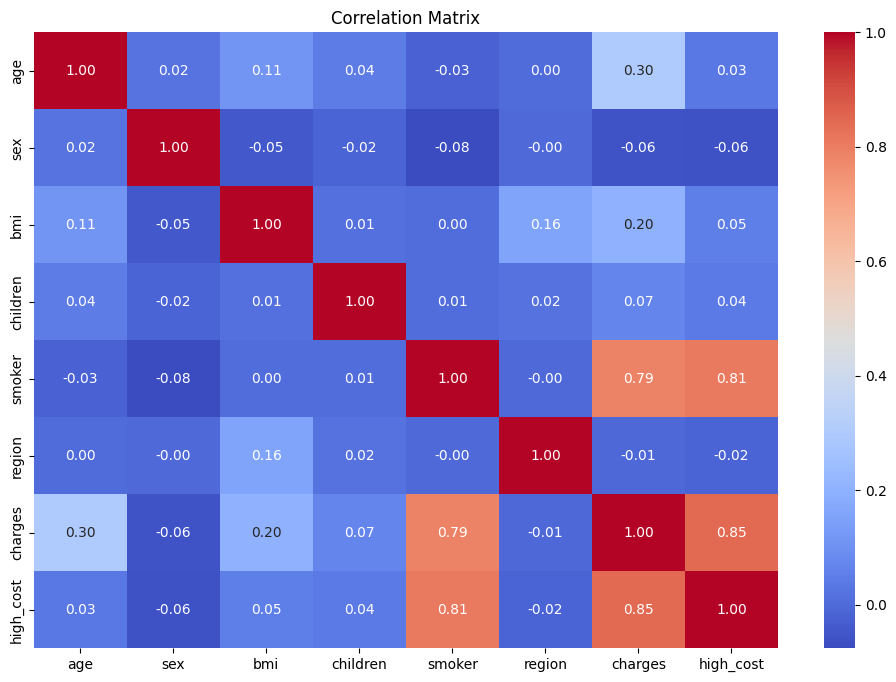

In [ ]:
# Compute correlation matrix
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Encoding categorical variables

In [ ]:
# Convert target to binary classification
df['high_cost'] = (df['charges'] >= 16000).astype(int)

In [ ]:
# Encode categorical variables
cat_cols = ['sex', 'smoker', 'region']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
# Define features and target
X = df.drop(columns=['charges', 'high_cost'])
y = df['high_cost']

In [ ]:
# Encode categorical columns
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['smoker'] = X['smoker'].map({'no': 0, 'yes': 1})
X['region'] = X['region'].astype('category').cat.codes


## Model Implementation and Evaluation

## Split Data

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba_lr):.4f}")

Logistic Regression Metrics:
Accuracy:  0.9291
Precision: 0.9808
Recall:    0.7391
F1 Score:  0.8430
ROC AUC:   0.8730


## Train and evaluate Decision Tree model

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

print("\nDecision Tree Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_dt):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba_dt):.4f}")


Decision Tree Metrics:
Accuracy:  0.8582
Precision: 0.7246
Recall:    0.7246
F1 Score:  0.7246
ROC AUC:   0.8146
